<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Exploratory Data Analysis on a Natural Language Processing Task
> Authors: Caroline Schmitt, Matt Brems

---

Exploratory data analysis (EDA) is a crucial part of any data science project. EDA helps us discover interesting relationships in the data, detect outliers and errors, examine our own assumptions about the data, and prepare for modeling. During EDA we might discover that we need to clean our data more conscientiously, or that we have more missing data than we realized, or that there aren't many patterns in the data (indicating that modeling may be challenging.)

In this lab you'll bring in a natural language dataset and perform EDA. The dataset contains Facebook statuses taken from between 2009 and 2011 as well as personality test results associated with the users whose Facebook statuses are included.

This dataset uses results from the Big Five Personality Test, also referred to as the five-factor model, which measures a person's score on five dimensions of personality:
- **O**penness
- **C**onscientiousness
- **E**xtroversion
- **A**greeableness
- **N**euroticism

Notoriously, the political consulting group Cambridge Analytica claims to have predicted the personalities of Facebook users by using those users' data, with the goal of targeting them with political ads that would be particularly persuasive given their personality type. Cambridge Analytica claims to have considered 32 unique 'groups' in the following fashion:
- For each of the five OCEAN qualities, a user is categorized as either 'yes' or 'no'.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$).

Cambridge Analytica's methodology was then, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big Five personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

In this lab you will perform EDA to examine many relationships in the data.

Exploratory data analysis can be a non-linear process, and you're encouraged to explore questions that occur to you as you work through the notebook.

> **Content note**: This dataset contains real Facebook statuses scraped from 2009 to 2011, and some of the statuses contain language that is not safe for work, crude, or offensive. The full dataset is available as `mypersonality.csv`, and a sanitized version containing only statuses that passed an automated profanity check is available as `mypersonality_noprofanity.csv`. Please do not hesitate to use `mypersonality_noprofanity.csv` if you would prefer to. Please note that the automated profanity check is not foolproof. If you have any concerns about working with this dataset, please get in touch with your instructional team.

---

### External resources

These resources are not required reading but may be of use or interest.

- [Python Graph Gallery](https://python-graph-gallery.com/)
- [Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits) on the Big Five test
- [A short (3-4 pages) academic paper](./celli-al_wcpr13.pdf) using the `MyPersonality` dataset to model personality

---

## Load packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

# This setting widens how many characters pandas will display 
# in a column:
pd.options.display.max_colwidth = 400

---

## Load data

In [4]:
df = pd.read_csv('data/mypersonality.csv')

# NOTICE! Do read the commented out code below...
# df = pd.read_csv('data/mypersonality_noprofanity.csv') 
# comment out above & 
# uncomment this to use mypersonality_noprofanity.csv if it 
# makes you more comfortable

df.drop(columns=['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 
                 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 
                 'TRANSITIVITY'], inplace=True)
df.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM


In [5]:
df = df.replace("n", 0)
df = df.replace("y", 1)

In [6]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/19/09 03:21 PM
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,07/02/09 08:41 AM
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/15/09 01:15 PM
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/22/09 04:48 AM
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,07/20/09 02:31 AM


In [7]:
df.dtypes

#AUTHID     object
STATUS      object
sEXT       float64
sNEU       float64
sAGR       float64
sCON       float64
sOPN       float64
cEXT         int64
cNEU         int64
cAGR         int64
cCON         int64
cOPN         int64
DATE        object
dtype: object

---

## EDA on Statuses

Before we even vectorize the text, we might look at the lengths and word counts in each Facebook status.

**Create a new column called `status_length` that contains the length of each status:**

In [8]:
df["status_length"] = df["STATUS"].str.len()
#df["status_length"]

In [9]:
#df

In [10]:
#df.head()

**Create a new column called `status_word_count` that contains the number of words in each status:**

Note: You can evaluate this based off of how many strings are separated by whitespaces; you're not required to check that each set of characters set apart by whitespaces is a word in the dictionary.

In [11]:
# Split word: Word Count
df["status_word_count"] = df["STATUS"].str.split().str.len()
df["status_word_count"]

0        5
1       13
2       26
3        9
4        3
        ..
9911     5
9912     5
9913     6
9914     4
9915    32
Name: status_word_count, Length: 9916, dtype: int64

### Longest and shortest statuses

Looking at individual observations can help us get a sense of what the dataset contains.

**Show the five longest and five shortest statuses based off of `status_word_count`:**

In [12]:
df["status_word_count"].describe()

count    9916.000000
mean       14.525111
std        12.463420
min         1.000000
25%         6.000000
50%        11.000000
75%        19.000000
max        89.000000
Name: status_word_count, dtype: float64

In [13]:
# Top 5 longest status
df.sort_values(by = ["status_word_count"])["STATUS"].tail()

9695    I was totally freaked out tonight while driving home with Janice at 12am. The black coupe next to me matched my speed even though I was going fast and then he continued to match me speed as I slowed down. So I turn to look at the driver of the car and he's wearing a mask. A rubber mask reminiscent to freddy cruger. 0_0 I almost had a heart attack. I then slowed down a lot and he continued on.....
5680        I always make it a rule to let the other fellow fire first.  If a man wants to fight, I argue the question with him and try to show him how foolish it would be.  If he can't be dissuaded, why then the fun begins but I always let him have first crack.  Then when I fire, you see, I have the verdict of self-defence on my side.  I know that he is pretty certain in his hurry, to miss.  I never do.
5208    can't believe it. I got the new Wii Fit Plus game, it has a lot of fun new games and features. However, after not using the wii fit for a few months we decided to do the fitnes

In [14]:
# Top 5 shortest status
df.sort_values(by = ["status_word_count"])["STATUS"].head()

8178         157
4170       wed,.
2016      HOUSE!
956      Err:509
4177    confused
Name: STATUS, dtype: object

## What's the distribution of post lengths?

Use visuals to show the distributions of post lengths. Show both the distribution of word counts and the distribution of lengths based off character.

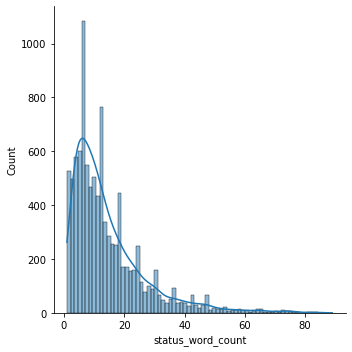

In [15]:
sns.displot(x = "status_word_count", data = df, kde=True);

In [16]:
df["status_word_count"].skew()

1.9539573430793284

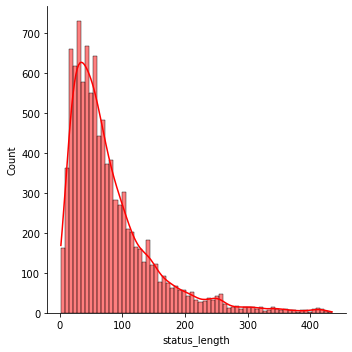

In [17]:
sns.displot(x = "status_length", data = df, kde=True, color="red");

In [18]:
df["status_length"].skew()

1.9346585343346359

Status word count and status length have a clear positive skew.

---

## EDA of Personality Scores

There are two sets of personality columns in the dataset: class and score. According to the attached paper, scores have been converted to categories based on whether a score for a user fell above or below the median.

### Plot the distributions of personality scores for all five score columns:

In [19]:
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'status_length',
       'status_word_count'],
      dtype='object')

In [20]:
#df.dtypes

In [21]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,status_word_count
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/19/09 03:21 PM,27,5
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,07/02/09 08:41 AM,63,13
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/15/09 01:15 PM,121,26
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/22/09 04:48 AM,42,9
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,07/20/09 02:31 AM,11,3


In [22]:
# Create function to plot distribution of each personality
def plot_personality(x1, data1, color1 = "aquamarine"):
    sns.displot(data = data1, x = x1, kde = True, color='navy',
            line_kws={'lw': 2}, facecolor=color1, edgecolor='black')
    plt.axvline(x = data1[x1].median(),
           color = "red", linewidth = 3)

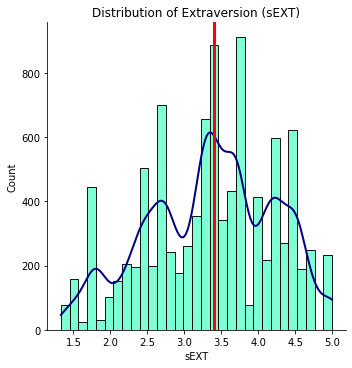

In [23]:
plot_personality("sEXT", df)
plt.title("Distribution of Extraversion (sEXT)");

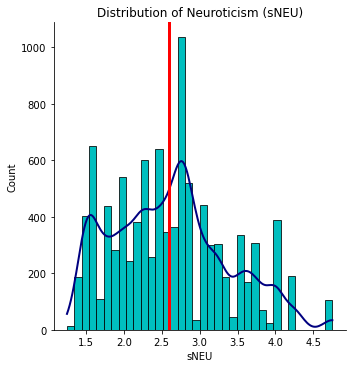

In [24]:
plot_personality("sNEU", df, "c")
plt.title("Distribution of Neuroticism (sNEU)");

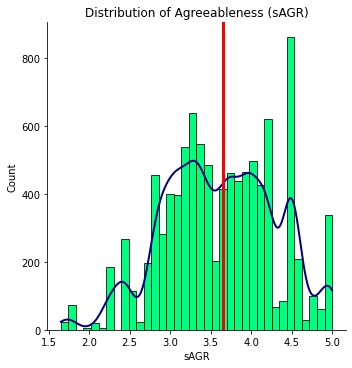

In [25]:
plot_personality("sAGR", df, "springgreen")
plt.title("Distribution of Agreeableness (sAGR)");

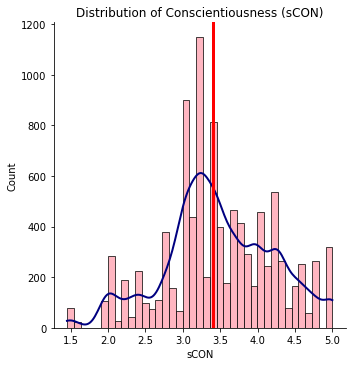

In [26]:
plot_personality("sCON", df, "lightpink")
plt.title("Distribution of Conscientiousness (sCON)");

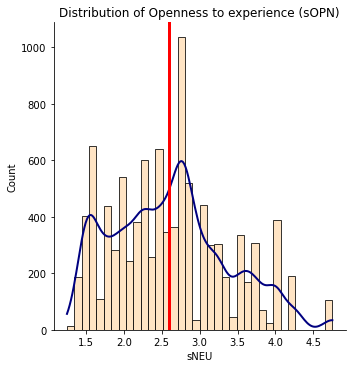

In [27]:
plot_personality("sNEU", df, "bisque")
plt.title("Distribution of Openness to experience (sOPN)");

---

### How many unique users exist in the dataset?

This dataset has redacted original poster names, but each user is given an `#AUTHID`. How many unique users are there, and how many posts per user do we have?

In [28]:
df["#AUTHID"].nunique()

# There are 250 unique users

250

In [29]:
df["STATUS"].count()/df["#AUTHID"].nunique()

# The average number of posts per user is 39.664 posts per user.

39.664

## EDA on unique users

Because we have many posts per user for most users, doing EDA on the personality score columns might be misleading. If we have 200 Facebook statuses from one very high-conscientiousness user, a bar chart of how many `'cCON'` statuses are associated with `'y'` might be misleading. We'll have to be careful about labeling and titling any visualizations we make off of the dataset.

**Create a new dataframe called `unique_users` that only contains the `#AUTHID`, personality score, and personality category columns:**

If you do this correctly, it should have 250 rows and 11 columns.

(Hint: You can use the pandas [drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) method to make this easier. The only column you want to consider when deciding if a user is duplicated is the `#AUTHID` column.)

In [30]:
unique_users = df.drop_duplicates(subset="#AUTHID")

In [31]:
unique_users = unique_users.drop(columns = ["STATUS", "DATE", "status_length", 
                                            "status_word_count"])

In [32]:
print(unique_users.shape)
unique_users.head()

(250, 11)


,#AUTHID,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
0,b7b7764cfa1c523e4e93ab2a79a946c4,2.65,3.00,3.15,3.25,4.40,0,1,0,0,1
102,318bf822d4f2bd3920367560218619c0,4.50,4.00,3.00,4.50,3.75,1,1,0,1,0
171,ecbddbfe00e0f83cfdb802a7186061c7,4.30,2.15,3.60,3.30,4.10,1,0,1,0,1
236,db39f7b2aad360b1033ec1f8fcd57f9c,4.65,3.20,3.05,3.65,4.75,1,1,0,1,1
246,4d035bd3fd8d9595d15cea9e388964be,3.70,2.90,3.40,3.35,4.05,1,1,0,0,1


**Plot the distribution of personality scores for `unique_users`:**

Do the distributions look different? Here, each individual user will only be represented once.

In [33]:
# The distribution of personality scores look more normal for the unique_users dataframe.

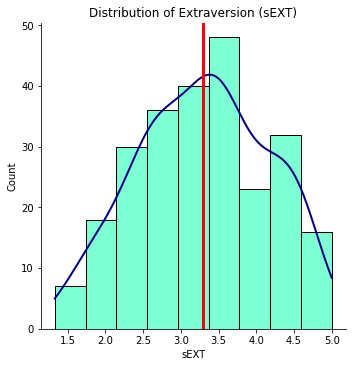

In [34]:
plot_personality("sEXT", unique_users)
plt.title("Distribution of Extraversion (sEXT)");

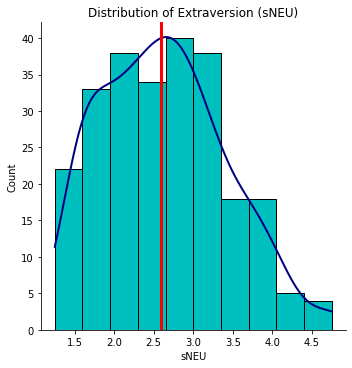

In [35]:
plot_personality("sNEU", unique_users, "c")
plt.title("Distribution of Extraversion (sNEU)");

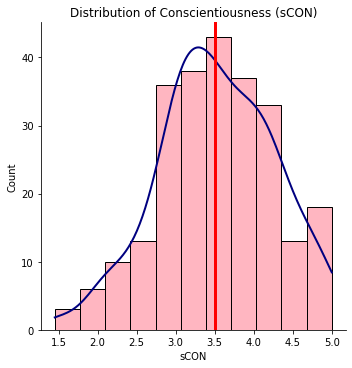

In [36]:
plot_personality("sCON", unique_users, "lightpink")
plt.title("Distribution of Conscientiousness (sCON)");

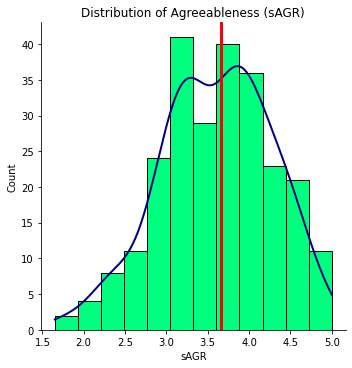

In [37]:
plot_personality("sAGR", unique_users, "springgreen")
plt.title("Distribution of Agreeableness (sAGR)");

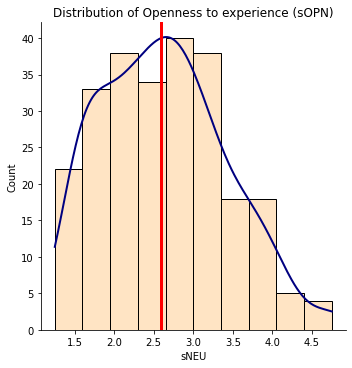

In [38]:
plot_personality("sNEU", unique_users, "bisque")
plt.title("Distribution of Openness to experience (sOPN)");

**Use the `.describe()` method on `unique_users`:**

In [39]:
unique_users.describe()

,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
count,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,3.292120,2.627240,3.600320,3.522920,4.07856,0.384000,0.396000,0.536000,0.520000,0.704000
std,0.861368,0.776835,0.670758,0.740211,0.57506,0.487334,0.490045,0.499703,0.500602,0.457407
min,1.330000,1.250000,1.650000,1.450000,2.25000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.662500,2.000000,3.150000,3.000000,3.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.300000,2.590000,3.660000,3.500000,4.15000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,4.000000,3.150000,4.100000,4.050000,4.50000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.000000,4.750000,5.000000,5.000000,5.00000,1.000000,1.000000,1.000000,1.000000,1.000000


### Plots vs. Tables

Consider what different information is easily conveyed by the plots of scores, versus the table with summary statistics. Explain when you might present a distribution versus when you might present a table of summary statistics.

In [40]:
# Distribution is easier to understand for non-technical audience.
# Table of summary statistics is more information dense for technical audience. 
# It should be used as reference for .

#### Other visualizations:

Create 1-2 additional visualizations related to the `unique_users` dataframe.

You might consider:
- Bar charts of users per category per trait
- Seaborn correlation heatmap
- Seaborn pairplot

In [41]:
no_sext = unique_users["cEXT"].value_counts()[1]
no_sneu = unique_users["cNEU"].value_counts()[1]
no_sagr = unique_users["cAGR"].value_counts()[1]
no_scon = unique_users["cCON"].value_counts()[1]
no_sopn = unique_users["cOPN"].value_counts()[1]
no_cat = (no_sext,no_sneu,no_sagr,no_scon,no_sopn)
no_cat

(96, 99, 134, 130, 176)

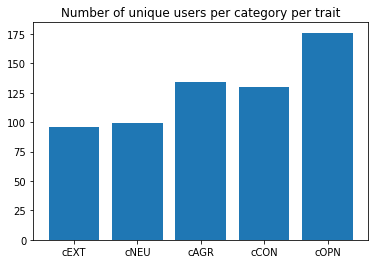

In [42]:
clist = ["cEXT","cNEU","cAGR","cCON","cOPN"]
plt.bar(clist,height=no_cat)
plt.title("Number of unique users per category per trait");

 Openness to experience is the most common trait for unique users.

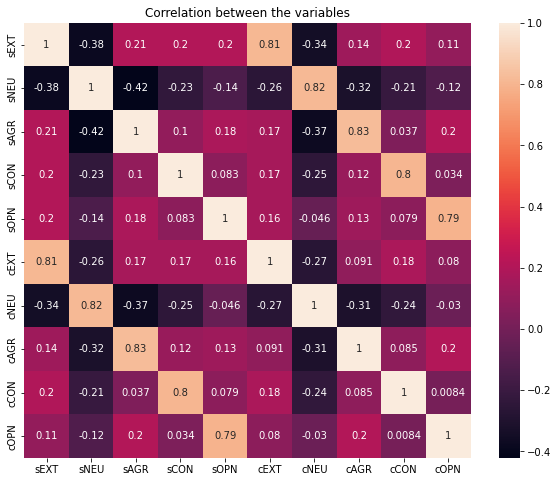

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(unique_users.corr(), annot=True)
plt.title("Correlation between the variables");

There is a negative correlation between Neuroticism and Extraversion (-0.38).
There is a negative correlation between Neuroticism and Agreeableness (-0.42).

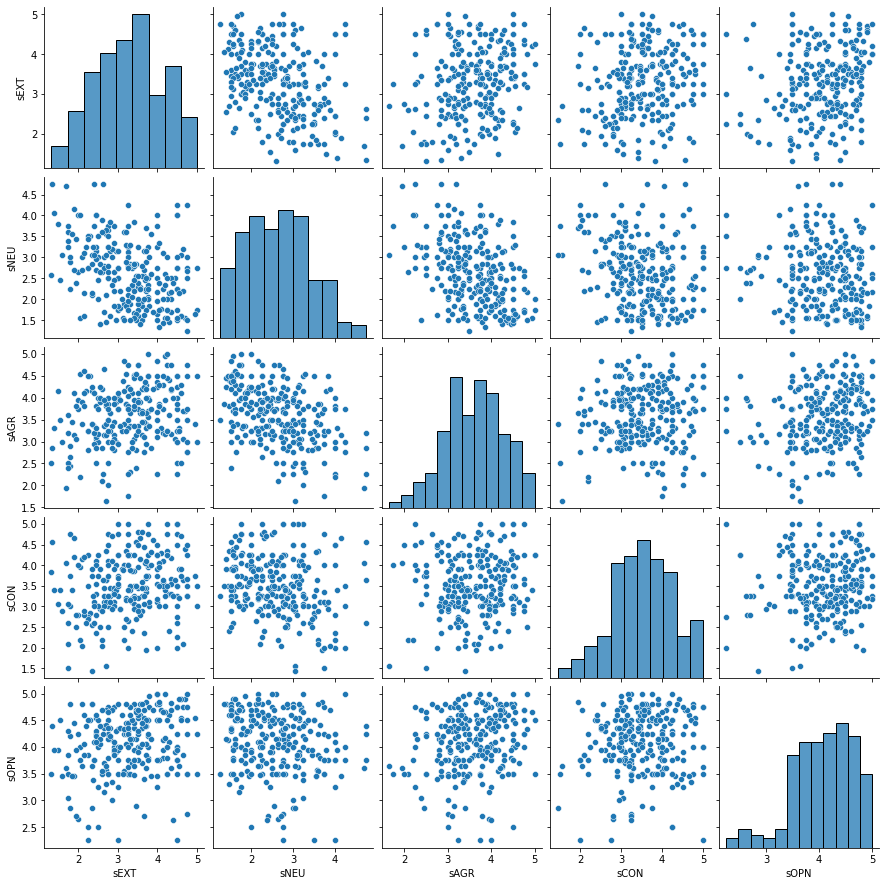

In [44]:
slist = ["sEXT","sNEU","sAGR","sCON","sOPN"]
sns.pairplot(unique_users,
             x_vars=slist,
             y_vars=slist,);

---

## Exploring status length and word count based on personality

**Using `groupby()`, find the mean status length and status word count for posts by users in the high and low categories of each of the Big 5 traits.**

You'll need to use `groupby()` five separate times for this.

In [45]:
df.groupby("cEXT")[["status_length","status_word_count"]].mean()

,status_length,status_word_count
cEXT,,
0,79.866655,14.394428
1,81.704918,14.702305


People with **Extraversion** trait tends to have longer status length and word count than people without the trait.

In [46]:
df.groupby("cNEU")[["status_length","status_word_count"]].mean()

,status_length,status_word_count
cNEU,,
0,80.852396,14.548314
1,80.304278,14.486414


People without **Neuroticism** trait tends to have longer status length and word count than people with the trait.

In [47]:
df.groupby("cAGR")[["status_length","status_word_count"]].mean()

,status_length,status_word_count
cAGR,,
0,80.976769,14.616692
1,80.355800,14.444276


People without **Agreeableness** trait tends to have longer status length and word count than people with the trait.

In [48]:
df.groupby("cCON")[["status_length","status_word_count"]].mean()

,status_length,status_word_count
cCON,,
0,81.920149,14.709515
1,79.149034,14.308165


People without **Conscientiousness** trait tends to have longer status length and word count than people with the trait.

In [49]:
df.groupby("cOPN")[["status_length","status_word_count"]].mean()

,status_length,status_word_count
cOPN,,
0,85.686298,15.450726
1,78.905143,14.205184


People without **Openness to experience** trait tends to have longer status length and word count than people with the trait.

In [50]:
clist = ["cEXT","cNEU","cAGR","cCON","cOPN"]
for i in clist:
    print(df.groupby(i)[["status_length","status_word_count"]].mean())
    print("-------------------------------")

      status_length  status_word_count
cEXT                                  
0         79.866655          14.394428
1         81.704918          14.702305
-------------------------------
      status_length  status_word_count
cNEU                                  
0         80.852396          14.548314
1         80.304278          14.486414
-------------------------------
      status_length  status_word_count
cAGR                                  
0         80.976769          14.616692
1         80.355800          14.444276
-------------------------------
      status_length  status_word_count
cCON                                  
0         81.920149          14.709515
1         79.149034          14.308165
-------------------------------
      status_length  status_word_count
cOPN                                  
0         85.686298          15.450726
1         78.905143          14.205184
-------------------------------


**Choose one of the personality category columns (i.e. `cOPN`, `cCON`, `cEXT`, `cAGR`, or `cNEU`.) Use `sns.distplot()` to visualize the distribution of status word counts for posts by users who score both high (`y`) and low (`n`) in that personality category:**

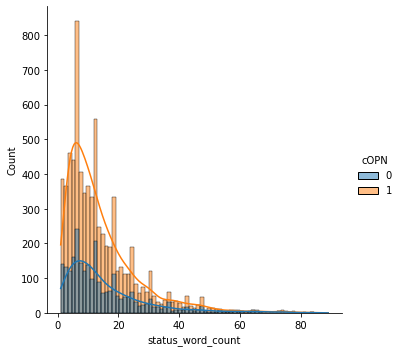

In [51]:
sns.displot(x= df["status_word_count"], hue = df["cOPN"],kde = True);

People without Openness to experience trait tends to have lower frequency and total number of word count than people with the trait. Yet, there average word count is higher. This can be intrepreted as they would rarely post a status but when there is a status post, it would be longer.

---

## EDA on Word Counts

### Vectorize the text

In order to perform EDA on word count data, we'll need to count-vectorize.

Create a dataframe that contains the count-vectorized text for each Facebook status in the dataset.

To do this, you might follow these steps:
- Instantiate a `CountVectorizer` object
- Fit the count vectorizer on the Facebook statuses
- Store the transformed data
- Convert to a dataframe and store
    - Don't forget that the transformed data will need to be 'densified'. The `toarray()` or `todense()` methods will allow this.
    - Don't forget that the `get_feature_names()` method on a fitted `CountVectorizer` object will bring you back the words learned from the dataset, which you can set as the `columns` argument when creating the dataframe.
    
It's up to you whether or not to keep stopwords in the dataset.

In [52]:
X = df["STATUS"]
# Instantiate a CountVectorizer
cvec = CountVectorizer(stop_words="english")

# Fit
cvec.fit(X)

# Transform
X = cvec.transform(X)

In [53]:
X

<9916x15183 sparse matrix of type '<class 'numpy.int64'>'
	with 69665 stored elements in Compressed Sparse Row format>

In [54]:
train_df = pd.DataFrame(X.todense(),
                        columns = cvec.get_feature_names_out())

In [55]:
train_df

,00,000,000ft,00am,00pm,01,02,02pm,03,0330,...,équipe,étais,était,étant,état,été,être,østersund,últimas,últimos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Show the 15 most common words

In [13]:
train_df.sum().sort_values(ascending = False).head(15)

propname    1309
just         717
day          534
like         506
time         424
going        414
today        402
new          386
work         369
good         354
got          314
night        312
love         292
tomorrow     277
know         276
dtype: int64

### Show the 15 frequency of the most common words as a bar chart

**Hint**: You can do this in one line of code. [This webpage](https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html) has an example.

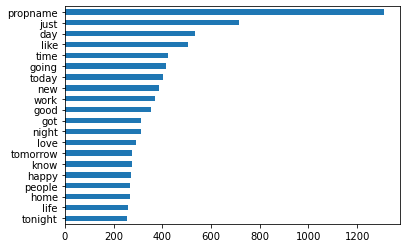

In [14]:
train_df.sum().sort_values(ascending = True).tail(20).plot.barh();

### Investigating `propname`

The word `propname` shows up frequently in this dataset. Show the first 10 statuses in the dataset that contain `propname`:

In [25]:
df.iloc[train_df["propname"].sort_values(ascending = False).head(10).index][["STATUS"]]

,STATUS
5093,"went white water rafting today for the first time in 10 years...since senior trip at WBC! Thought of you Wilshire friends - *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME* *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*..."
4283,"Sorry, People magazine... your ""sexy"" guys can't hold a candle to the men of the 40s, 50s and 60s... *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*..."
4719,"thinks she must say her name strangle when answering the phone at work, as most ppl hear (*PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*, and *PROPNAME*)...I am not sure how they get that from ""*PROPNAME* speaking"" lol but it is funny to be called *PROPNAME* and *PROPNAME*??? Crazy day lol"
5224,"The feminine version of the name *PROPNAME* meaning ""the woman."" Basically never printed on magnets, mugs or other souvenir paraphernalia. Often mistaken for *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME* or *PROPNAME*. My name is *PROPNAME*, not *PROPNAME*, dammit. (Urbandictionary.com, type in your first name, copy and paste the first entry)"
7029,"has a big bet on the WSOP final table... I bet on *PROPNAME* to win vs *PROPNAME* to win against *PROPNAME*. Any other winners is a tie. I figure *PROPNAME* is about 3:1 & *PROPNAME* is about 7.5:1 I loooove my bet right now (no odds!) I wanted to book more action last night vs *PROPNAME* when I saw him at the Bellagio, but he doesn't like his side anymore. Ship the EV kidd!!!!!"
5045,"thinks tomorrow with *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME*, *PROPNAME* ? and *PROPNAME* is gunna be jokes at Dancin Dragon ;)"
1360,"has two kittens! The girl is *PROPNAME* and I need help with the boy... it's between *PROPNAME*, *PROPNAME*, *PROPNAME*, and *PROPNAME*. VOTE!"
5092,welcomes *PROPNAME* into the world! Congratulations *PROPNAME* and *PROPNAME* and *PROPNAME* and *PROPNAME*!
6790,"No wonder *PROPNAME* *PROPNAME* *PROPNAME* dumped *PROPNAME*. His song about her is HORRENDOUS, even for a 90s ballad. Now I understand that *PROPNAME* is a (marginal) step up for her. *Shudder*"
2426,"*PROPNAME*: This is a deliberate insult against me and my people. *PROPNAME*. *PROPNAME*: Who the fuck are his people? *PROPNAME*: I don't know... little scientists, I guess."


**Provide a short explanation of what you believe `propname` to be:**

In [42]:
# propname is likely to be property name a part of website or platform.
# It is likely to be a variable in another list or database.

## Most common words based on personality category

In order to do more targeted EDA, we'll need to be able to reference not only the dataframe of vectorized statuses, but also the personality scores from the original dataframe.

**Create a new dataframe called `text_and_scores` that concatenates the count-vectorized statuses side-by-side with the original personality category columns:**

In [68]:
print (df.shape,train_df.shape)

(9916, 15) (9916, 15183)


In [69]:
text_and_scores = pd.concat([df,train_df],axis = 1)

In [70]:
text_and_scores.shape

(9916, 15198)

In [71]:
text_and_scores.head(3)

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,...,équipe,étais,était,étant,état,été,être,østersund,últimas,últimos
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,0,1,0,...,0,0,0,0,0,0,0,0,0,0


**Show the 25 most common words for statuses from high-cAGR users:**

In [74]:
text_and_scores.groupby("cAGR").mean()

,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cCON,cOPN,status_length,...,équipe,étais,était,étant,état,été,être,østersund,últimas,últimos
cAGR,,,,,,,,,,,,,,,,,,,,,
0,3.219445,2.834685,3.016143,3.413964,3.979841,0.328243,0.521618,0.443536,0.580770,80.976769,...,0.00043,0.000215,0.00043,0.00043,0.000215,0.000215,0.000645,0.000215,0.000215,0.000215
1,3.474141,2.410765,4.146564,3.527450,4.263159,0.509398,0.245301,0.473514,0.886463,80.355800,...,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [22]:
text_and_scores[text_and_scores["cAGR"] == 1][cvec.get_feature_names_out()].sum().sort_values(ascending = False).head(25)

propname    699
just        402
day         297
like        280
time        221
today       219
work        206
good        201
going       200
new         194
love        172
happy       165
night       161
know        157
got         157
people      156
tomorrow    153
life        140
home        131
tonight     129
really      127
don         119
want        108
weekend     105
ll          103
dtype: int64

**Show the 25 most common words for statuses from low-cAGR users:**

In [23]:
text_and_scores[text_and_scores["cAGR"] == 0][cvec.get_feature_names_out()].sum().sort_values(ascending = False).head(25)

propname    610
just        315
day         237
like        226
going       214
time        203
new         192
today       183
work        163
got         157
good        153
night       151
home        136
don         134
tonight     127
tomorrow    124
life        120
love        120
really      119
know        119
people      112
think       110
want        109
happy       107
week         98
dtype: int64

### (BONUS) Most common bigrams:

This is a bonus section and not required (**_though highly recommended_**).

Find the 10 most common [bigrams](https://en.wikipedia.org/wiki/Bigram) in the dataset.

In [6]:
X2 = df["STATUS"]
# Instantiate a CountVectorizer
cvec2 = CountVectorizer(stop_words="english",ngram_range=(2,2))

# Fit
cvec2.fit(X2)

# Transform
X2 = cvec2.transform(X2)

In [7]:
train_df2 = pd.DataFrame(X2.todense(),
                        columns = cvec2.get_feature_names_out())

In [9]:
train_df2.sum().sort_values(ascending = False).head(10)

propname propname    147
just got              55
new year              53
http www              46
merry christmas       44
looking forward       43
feel like             39
happy new             32
don know              31
birthday wishes       29
dtype: int64

### (BONUS) Most common trigrams:

This is a bonus section and not required (**_though highly recommended_**).

Find the 10 most common [trigrams](https://en.wikipedia.org/wiki/Trigram) in the dataset.

In [6]:
X3 = df["STATUS"]
# Instantiate a CountVectorizer
cvec3 = CountVectorizer(stop_words="english",ngram_range=(3,3))

# Fit
cvec3.fit(X3)

# Transform
X3 = cvec3.transform(X3)

In [7]:
train_df3 = pd.DataFrame(X3.todense(),
                        columns = cvec3.get_feature_names_out())

In [8]:
train_df3.sum().sort_values(ascending = False).head(10)

propname propname propname    54
gainesville film industry     23
www examiner com              23
http www examiner             23
24676 gainesville film        23
film industry examiner        23
happy new year                21
examiner com examiner         20
com examiner 24676            20
examiner 24676 gainesville    20
dtype: int64

---

## Choose your own adventure

By now you've looked at a lot of visualizations and frequency counts.

Come up with 2-3 questions about the data, and try to answer them using descriptive statistics (like counts, averages, etc.) or visualizations.

Some questions you might explore:
- Have numbers been redacted, or are phone numbers, house numbers, or zip codes anywhere in the dataset?
- `PROPNAME` has been used to redact personal names. Given that this data was scraped between 2009 and 2011, investigate if any public figures or famous people show up in the dataset, or their names have been redacted as well.
- Is count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?
- Is _average_ word count per status related to any personality category or personality metric?
- Is punctuation use related to personality?

Or, of course, come up with your own questions to investigate!

The focus here is on "explore" -- you might not find anything of particular interest, but don't let that discourage you.

### Q1. I would like to further explore propname and understand how they redact personal names.

In [13]:
df.iloc[train_df[train_df["propname"]>0].index][["STATUS"]].head()

,STATUS
6,"saw a nun zombie, and liked it. Also, *PROPNAME* + Tentacle!Man + Psychic Powers = GREAT Party."
18,"is tired. *PROPNAME*, let me go to sleep pl0x."
69,has a fair idea of how to manage the 2.5 kids cliche... She just needs a very strong gentleman named *PROPNAME* and thriteen wet napkins.
101,has a serious crush on *PROPNAME*. <3
104,Mondays are the new thursdays- anthony bourdain + *PROPNAME* = forgetting your financial troubles


Anthony Bourdain is a public figure still show up in the dataset. His name is in lower case at index 104. This is a indicator that the data might be censored by title case.

In [17]:
df.iloc[train_df[train_df["propname"]>0].index][["STATUS"]].sample(20)

,STATUS
7836,"Hello, FHS Class of 2000! We are planning a 10 year reunion for this May//June. If you have thoughts//suggestions then feel free to contact me or *PROPNAME*. Thanks!"
900,is Back from adding a *PROPNAME* to the Cambridge Campus.
5644,"has the same Spring Break as *PROPNAME*! If any Cornellians want a super awesome place to visit during their Spring Break, keep Chicago in mind..."
2559,"*PROPNAME*, I saw BMW Accident with Nissan Sunny around EXPO this morn b4 service, Nissan seemed to get damage less. BMW no airbags came out, Nissan Airbags out. BMW passengers got injury... I know cos BMW driver dad's cell group friend... so... drive safe... =)"
5171,is feeling productive after posting *PROPNAME*'s care on autotrader. If anyone is possibly interested in a 2006 Honda Civic Si for ~$13500 let me know. I will post the link too once it's officially up on the site!
4404,is going to see *PROPNAME*..WOOO...is going to see *PROPNAME*...WOOO! So psyched!!!!
6310,Question: How does one get 8th graders to shut the ____up?! *PROPNAME*? *PROPNAME*? *PROPNAME*? *PROPNAME*? I know you know - I'm exhausted.
8379,"is energized by super last minute flights, and very grateful to *PROPNAME*'s mother."
8108,"Hangin' with *PROPNAME*...stay awake, stay awake! *pokes self with fork*"
1300,~ *PROPNAME*'s swing dancing equals epic. xD


*PROPNAME* usually appear after the word "with" or before "'s". 

### Q2. I would like to further explore the count of uppercase letters vs. lowercase letters per status related to any personality category or personality score?

In [15]:
df['uppercase'] = df['STATUS'].str.count(r'[A-Z]')
df['lowercase'] = df['STATUS'].str.count(r'[a-z]')

In [16]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,status_length,uppercase,lowercase
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/19/09 03:21 PM,27,0,22
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she can't get to sleep.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,07/02/09 08:41 AM,63,0,47
2,b7b7764cfa1c523e4e93ab2a79a946c4,"is sore and wants the knot of muscles at the base of her neck to stop hurting. On the other hand, YAY I'M IN ILLINOIS! <3",2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/15/09 01:15 PM,121,16,74
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,06/22/09 04:48 AM,42,0,33
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1,07/20/09 02:31 AM,11,0,6


In [17]:
clist = ["cEXT","cNEU","cAGR","cCON","cOPN"]
for i in clist:
    print(df.groupby(i)[['uppercase','lowercase']].mean())
    print(f"Diff:{round( df.groupby(i)[['uppercase','lowercase']].mean().diff().iloc[1].values[0],4)}")
    print("-------------------------------")
    

      uppercase  lowercase
cEXT                      
0      4.127212  56.953040
1      4.267047  58.133048
Diff:0.1398
-------------------------------
      uppercase  lowercase
cNEU                      
0      4.130505  57.729634
1      4.280065  56.994081
Diff:0.1496
-------------------------------
      uppercase  lowercase
cAGR                      
0      4.211443  57.713487
1      4.164610  57.224796
Diff:-0.0468
-------------------------------
      uppercase  lowercase
cCON                      
0      4.251306  58.248507
1      4.110404  56.519096
Diff:-0.1409
-------------------------------
      uppercase  lowercase
cOPN                      
0      4.457793  60.892422
1      4.092821  56.265436
Diff:-0.365
-------------------------------


In [18]:
df.groupby(i)[['uppercase','lowercase']].mean().diff().iloc[1].values[0]

-0.3649722042003338

---

## Exploratory vs. Explanatory Data Analysis 

> **Exploratory analysis** is what you do to get familiar with the data. You may start out with a hypothesis or question, or you may just really be delving into the data to determine what might be interesting about it. Exploratory analysis is the process of turning over 100 rocks to find perhaps 1 or 2 precious gemstones.
>
> **Explanatory analysis** is what happens when you have something specific you want to show an audience - probably about those 1 or 2 precious gemstones. In my blogging and writing, I tend to focus mostly on this latter piece, explanatory analysis, when you've already gone through the exploratory analysis and from this have determined something specific you want to communicate to a given audience: in other words, when you want to tell a story with data.

- Cole Nussbaumer Knaflic, [exploratory vs. explanatory analysis](http://www.storytellingwithdata.com/blog/2014/04/exploratory-vs-explanatory-analysis)

### Choose one visual to explain:

Now that you've performed an exploratory data analysis, choose a visual (or 1-3 related visuals) to frame as **_explanatory_**. This can be a visual you created above, or you can create a new visual. For this visual, make sure the visuals are formatted clearly, and provide a one to two paragraph explanation/interpretation of the visual.

In [60]:
score = ['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']
title = ['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']
colors = ["blue","lightpink", "green", "aqua", "red"]

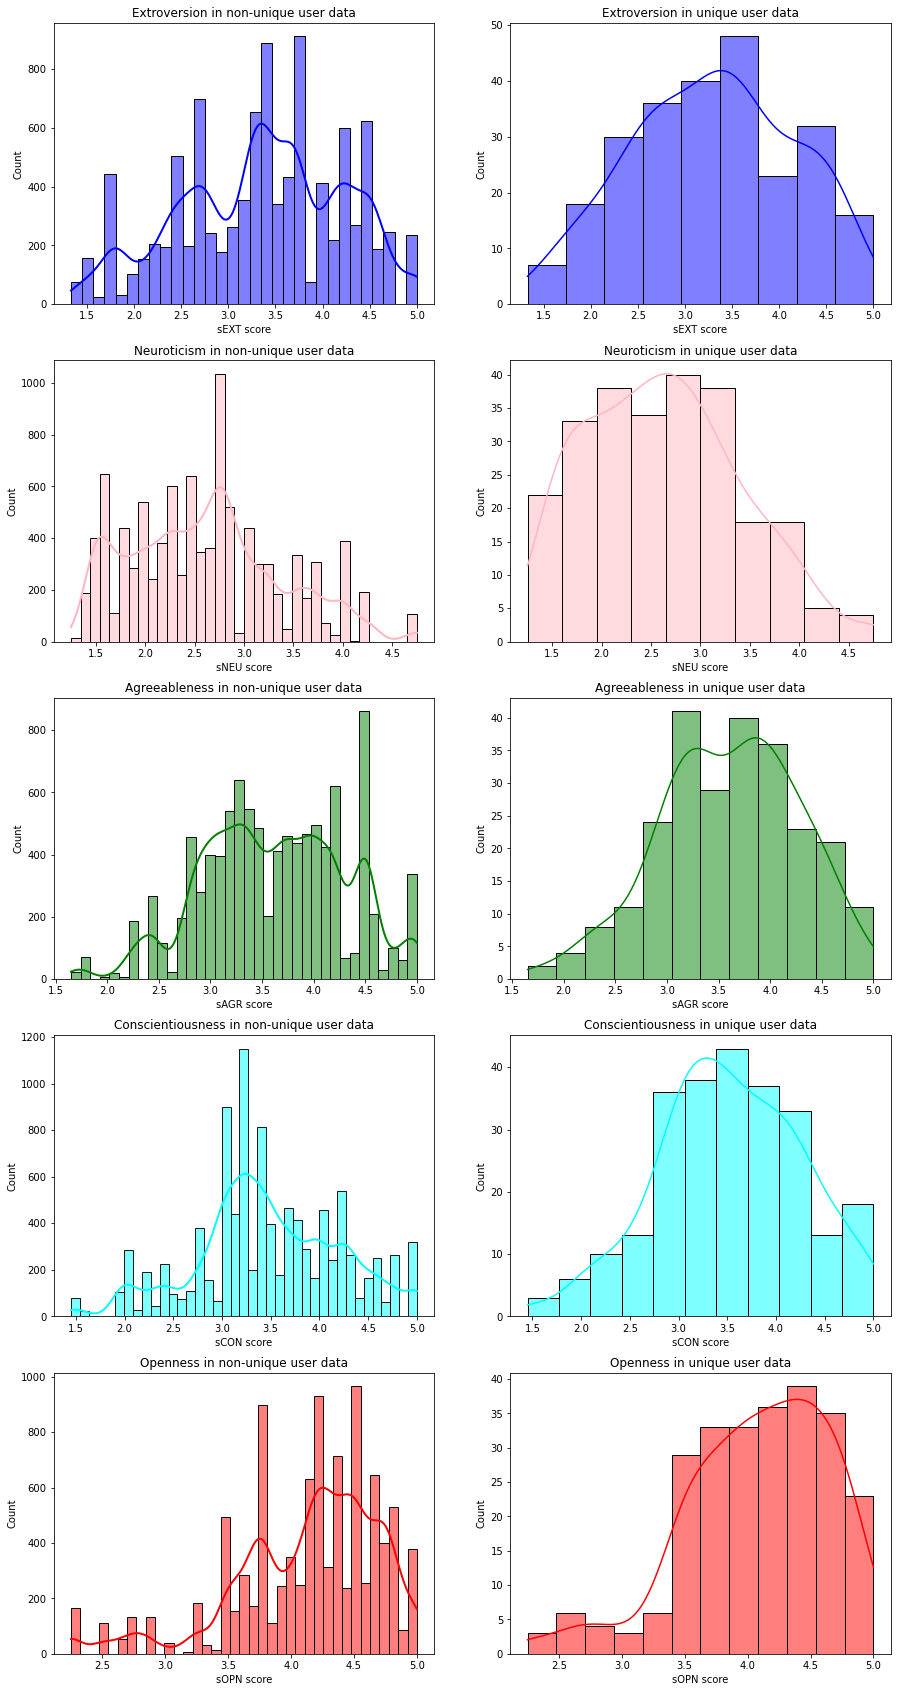

In [66]:
# Plot top 20 related features against saleprice.

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15,30))

for i, feat in enumerate(clist): ## iterate column name
    sns.histplot(df[score[i]], kde=True, line_kws={'color': 'red', 'lw': 2},
                 color = colors[i],ax = ax[i][0])
    ax[i][0].set_title(f'{title[i]} in non-unique user data')
    ax[i][0].set_xlabel(f'{score[i]} score')
    sns.histplot(unique_users[score[i]], kde=True, line_kws={'color': 'red', 'lw': 2},
                 color = colors[i], ax = ax[i][1])
    ax[i][1].set_title(f'{title[i]} in unique user data')
    ax[i][1].set_xlabel(f'{score[i]} score')

The distribution for each group of traits have different distribution. The people with openness trait are the most likely group as they have the highest proportion. Moreover, they tend to post status more frequently with a clear negative skewed distribution.

In [76]:
df[clist].mean()

cEXT    0.424466
cNEU    0.374849
cAGR    0.531162
cCON    0.459459
cOPN    0.743142
dtype: float64